In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [73]:
dataset = pd.read_csv("../data/train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
dataset.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [75]:
datatypes = dataset.columns.to_series().groupby(dataset.dtypes).groups
datatypes

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [76]:
# Dropping id from dataset

dataset.drop(['Id'], axis=1, inplace = True)
# Converting Categorical Values

dataset[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']] = dataset[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)


In [77]:
# Check for NAN values

dataset.isna().sum()

# Filling NaN values with mean

for i in dataset.columns[dataset.isnull().any(axis=0)]:    
    dataset[i].fillna(dataset[i].mean(),inplace=True)

dataset.describe().T

/tmp/ipykernel_33835/2102677247.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace=True)


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.000000,70.0,190.0
MSZoning,1460.0,3.028767,0.632017,0.0,3.0,3.000000,3.0,4.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.0,70.049958,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.500000,11601.5,215245.0
Street,1460.0,0.995890,0.063996,0.0,1.0,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...
MoSold,1460.0,6.321918,2.703626,1.0,5.0,6.000000,8.0,12.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.000000,2009.0,2010.0
SaleType,1460.0,7.513014,1.552100,0.0,8.0,8.000000,8.0,8.0
SaleCondition,1460.0,3.770548,1.100854,0.0,4.0,4.000000,4.0,5.0


<Axes: title={'center': 'Correlation with SalePrice '}>

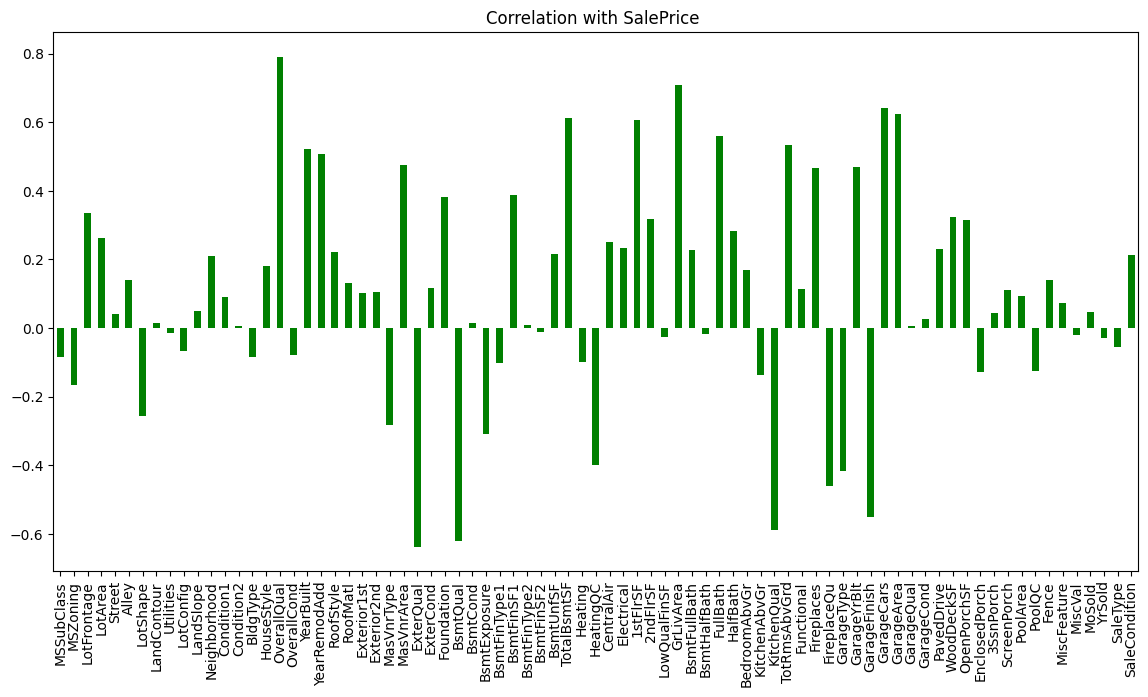

In [78]:
dataset.drop('SalePrice', axis=1).corrwith(dataset.SalePrice).plot(kind='bar', color='Green', figsize=(14, 7), title="Correlation with SalePrice ")


In [79]:
# Choosing X and y 

X = dataset.drop('SalePrice', axis=1)
y = dataset.SalePrice

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
dataset_test = pd.read_csv('../data/test.csv')
dataset_test1 = dataset_test.copy()

dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
# Dropping id from dataset

dataset_test.drop(['Id'], axis=1, inplace = True)
# Converting Categorical Values

dataset_test[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']] = dataset_test[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)

In [82]:
# Check for NAN values

dataset_test.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [83]:
# Filling NaN values with mean

for i in dataset_test.columns[dataset_test.isnull().any(axis=0)]:    
    dataset_test[i].fillna(dataset_test[i].mean(),inplace=True)

/tmp/ipykernel_33835/1427519042.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test[i].fillna(dataset_test[i].mean(),inplace=True)


In [84]:
lgr = LGBMRegressor()
lgr.fit(X_train,y_train)
pred_t = lgr.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3010
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 71
[LightGBM] [Info] Start training from score 181312.692759


In [85]:
print("R^2 on training  data ",lgr.score(X_train, y_train))
print("R^2 on testing data ",lgr.score(X_test,y_test))

R^2 on training  data  0.9767270029578077
R^2 on testing data  0.9000635122683505


In [86]:
mse = mean_squared_error(y_test, pred_t)
rmse = np.sqrt(mse)
rmse

np.float64(26407.691711514868)

In [87]:
pred_lgr = lgr.predict(dataset_test)

In [88]:
pred = pd.DataFrame(pred_lgr, columns=['SalePrice'])
output = pd.concat([dataset_test1['Id'],pred],axis=1).set_index(['Id'])
output.to_csv('submission.csv')

In [89]:
output

,SalePrice
Id,
1461,126624.605322
1462,148982.566145
1463,189390.532286
1464,186966.737200
1465,209238.620494
...,...
2915,80165.865019
2916,86975.560614
2917,154016.689110
